# 1.0 Install and Imports

In [ ]:
!pip install nxviz==0.6.3

     |████████████████████████████████| 10.3 MB 10.1 MB/s 
     |████████████████████████████████| 11.5 MB 41.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install unidecode

     |████████████████████████████████| 241 kB 7.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import nxviz
from nxviz import CircosPlot
import matplotlib.patches as mpatches
import seaborn as sns
from unidecode import unidecode

# 2.0 Getting and Preparing Data

## 2.1 Import csv

In [ ]:
#Airports coordenates
airports_coordenates_db = pd.read_csv("/content/AerodromosPublicos.csv", sep=';')

traffic_db_2019 = pd.read_csv("/content/resumo_anual_2019.csv", encoding="Latin-1", sep=';')
traffic_db_2020 = pd.read_csv("/content/resumo_anual_2020.csv", encoding="Latin-1", sep=';')

## 2.2 Cleaning columns name

In [ ]:
def clean_col(col):
    col = col.strip()
    col = col.replace("(","")
    col = col.replace(")","")
    col = col.replace(" ","_")
    col = unidecode(col)
    col = col.lower()
    return col

In [ ]:
airports_coordenates_db.columns = [clean_col(c) for c in airports_coordenates_db.columns]
airports_coordenates_db.columns.tolist()

['codigo_oaci',
 'ciad',
 'nome',
 'municipio',
 'uf',
 'municipio_servido',
 'uf_servido',
 'latgeopoint',
 'longeopoint',
 'latitude',
 'longitude',
 'altitude',
 'operacao_diurna',
 'operacao_noturna',
 'designacao_1',
 'comprimento_1',
 'largura_1',
 'resistencia_1',
 'superficie_1',
 'designacao_2',
 'comprimento2',
 'largura_2',
 'resistencia_2',
 'superficie_2',
 'situacao',
 'validadedoregistro',
 'portariaderegistro',
 'link_portaria']

In [ ]:
airports_coordenates = airports_coordenates_db.iloc[:,[0,2,3,4,7,8]].copy()
airports_coordenates.columns = ["airport_code", "airport_name", "city", "state", "lat", "lon"]
airports_coordenates.head()

airport_code                       airport_name  ...        lat        lon
0         SBRB                  Plácido de Castro  ...  -9.868333 -67.898056
1         SNGA                          Guarapari  ... -20.646389 -40.491667
2         SBIZ            Prefeito Renato Moreira  ...  -5.530556 -47.458333
3         SBPC  Embaixador Walther Moreira Salles  ... -21.837778 -46.566111
4         SSCD                    Chapadão do Sul  ... -18.839167 -52.488056

[5 rows x 6 columns]

In [ ]:
traffic_db_2019.columns = [clean_col(c) for c in traffic_db_2019.columns]
traffic_db_2019.columns.tolist()

['empresa_sigla',
 'empresa_nome',
 'empresa_nacionalidade',
 'ano',
 'mes',
 'aeroporto_de_origem_sigla',
 'aeroporto_de_origem_nome',
 'aeroporto_de_origem_uf',
 'aeroporto_de_origem_regiao',
 'aeroporto_de_origem_pais',
 'aeroporto_de_origem_continente',
 'aeroporto_de_destino_sigla',
 'aeroporto_de_destino_nome',
 'aeroporto_de_destino_uf',
 'aeroporto_de_destino_regiao',
 'aeroporto_de_destino_pais',
 'aeroporto_de_destino_continente',
 'natureza',
 'grupo_de_voo',
 'passageiros_pagos',
 'passageiros_gratis',
 'carga_paga_kg',
 'carga_gratis_kg',
 'correio_kg',
 'ask',
 'rpk',
 'atk',
 'rtk',
 'combustivel_litros',
 'distancia_voada_km',
 'decolagens',
 'carga_paga_km',
 'carga_gratis_km',
 'correio_km',
 'assentos',
 'payload',
 'horas_voadas',
 'bagagem_kg']

In [ ]:
traffic_db_2020.columns = [clean_col(c) for c in traffic_db_2020.columns]
traffic_db_2020.columns.tolist()

['empresa_sigla',
 'empresa_nome',
 'empresa_nacionalidade',
 'ano',
 'mes',
 'aeroporto_de_origem_sigla',
 'aeroporto_de_origem_nome',
 'aeroporto_de_origem_uf',
 'aeroporto_de_origem_regiao',
 'aeroporto_de_origem_pais',
 'aeroporto_de_origem_continente',
 'aeroporto_de_destino_sigla',
 'aeroporto_de_destino_nome',
 'aeroporto_de_destino_uf',
 'aeroporto_de_destino_regiao',
 'aeroporto_de_destino_pais',
 'aeroporto_de_destino_continente',
 'natureza',
 'grupo_de_voo',
 'passageiros_pagos',
 'passageiros_gratis',
 'carga_paga_kg',
 'carga_gratis_kg',
 'correio_kg',
 'ask',
 'rpk',
 'atk',
 'rtk',
 'combustivel_litros',
 'distancia_voada_km',
 'decolagens',
 'carga_paga_km',
 'carga_gratis_km',
 'correio_km',
 'assentos',
 'payload',
 'horas_voadas',
 'bagagem_kg']

In [ ]:
traffic_2019 = traffic_db_2019.iloc[:,[5,11,17]].copy()
traffic_2019.columns = ["airport_origin_code", "airport_destination_code", "nature"]
traffic_2019 = traffic_2019.loc[traffic_2019.nature == "DOMÉSTICA",:].iloc[:,[0,1]].copy()
traffic_2019.head()

airport_origin_code airport_destination_code
1195                SBAE                     SBAE
1196                SBAE                     SBKP
1197                SBAE                     SBKP
1198                SBAE                     SBML
1199                SBAE                     SBPS

In [ ]:
traffic_2020 = traffic_db_2020.iloc[:,[5,11,17]].copy()
traffic_2020.columns = ["airport_origin_code", "airport_destination_code", "nature"]
traffic_2020 = traffic_2020.loc[traffic_2020.nature == "DOMÉSTICA",:].iloc[:,[0,1]].copy()
traffic_2020.head()

airport_origin_code airport_destination_code
692                SBAE                     SBGR
693                SBAE                     SBKP
694                SBAE                     SBKP
695                SBAE                     SBML
696                SBAE                     SBPS

# Creating nx graph

In [ ]:
#Creating graph
G_2019 = nx.Graph()
for index, row in airports_coordenates.iterrows():
  G_2019.add_node(row['airport_code'], airport_name=row['airport_name'], lat=row['lat'], lon=row['lon'], city=row['city'], state=row['state'])

for index, row in traffic_2019.iterrows():
  G_2019.add_edge(row['airport_origin_code'], row['airport_destination_code'])

for n, d in G_2019.nodes(data=True):
    G_2019.nodes[n]["class"] = G_2019.degree(n)

G_2019.number_of_nodes()

522

In [ ]:
#Removing isolated nodes from the graph
G_2019.remove_nodes_from(list(nx.isolates(G_2019)))
G_2019.number_of_nodes()

173

In [ ]:
#Creating graph
G_2020 = nx.Graph()
for index, row in airports_coordenates.iterrows():
  G_2020.add_node(row['airport_code'], airport_name=row['airport_name'], lat=row['lat'], lon=row['lon'], city=row['city'], state=row['state'])

for index, row in traffic_2020.iterrows():
  G_2020.add_edge(row['airport_origin_code'], row['airport_destination_code'])

for n, d in G_2020.nodes(data=True):
    G_2020.nodes[n]["class"] = G_2020.degree(n)

G_2020.number_of_nodes()

528

In [ ]:
#Removing isolated nodes from the graph
G_2020.remove_nodes_from(list(nx.isolates(G_2020)))
G_2020.number_of_nodes()

197

In [ ]:
G_2019.number_of_edges()

1115

In [ ]:
G_2020.number_of_edges()

1078

# Network Analysis

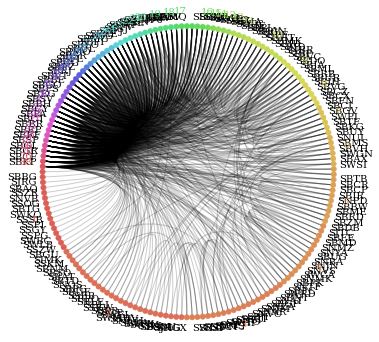

In [ ]:
c = CircosPlot(
    G_2019,
    node_grouping="class",
    node_color="class",
    node_order="class",
    node_labels=True,
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=2,
)
c.draw()
plt.show()

## NX Eccentricity/Diameter

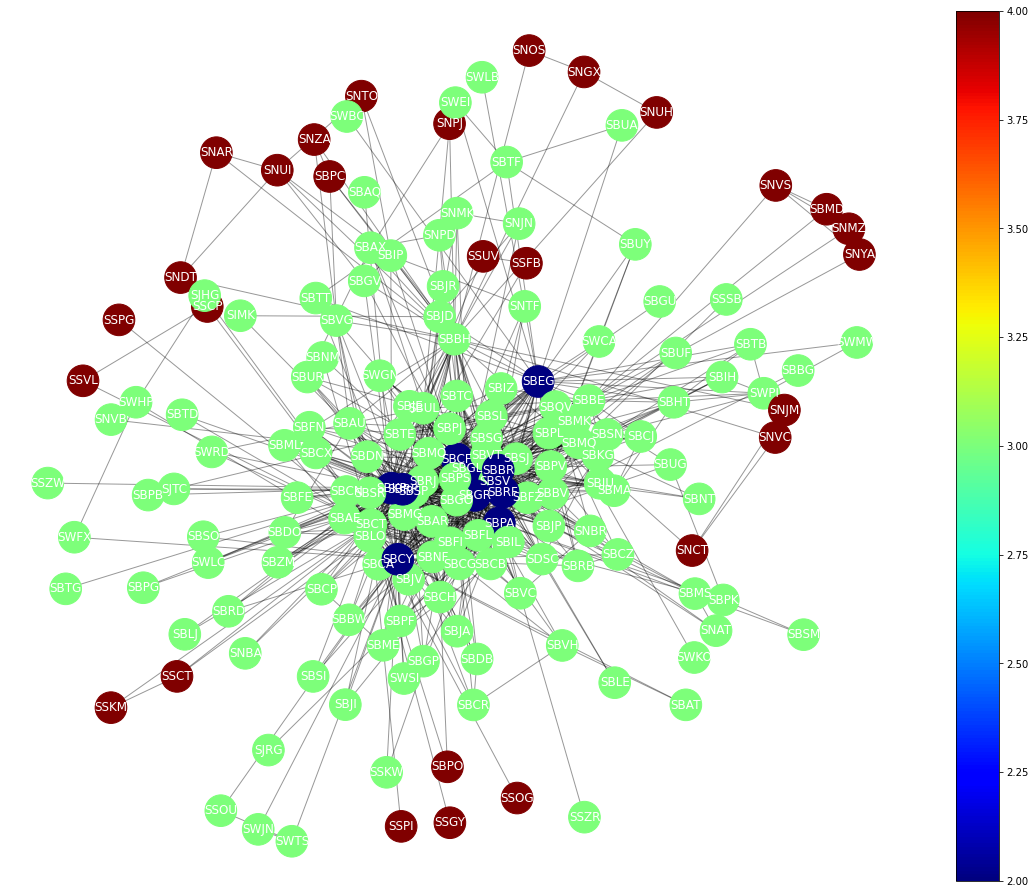

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G_2019,seed=123456789,k=0.3)
# color of nodes based on eccentricity
color = list(dict(nx.eccentricity(G_2019)).values())

# draw edges
nx.draw_networkx_edges(G_2019,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2019, 
                node_size=1000,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2019, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eccentricity.png', transparent=True,dpi=300)
plt.show()

In [ ]:
# the diameter of networks is the maximum eccentricy
print("Diameter of network (2019): {}".format(nx.diameter(G_2019)))

# whom are in the diamter
print([k for k,v in nx.eccentricity(G_2019).items() if v == nx.diameter(G_2019)])

Diameter of network (2019): 4
['SBPC', 'SSKM', 'SNGX', 'SNOS', 'SSFB', 'SBPO', 'SSOG', 'SNDT', 'SSCP', 'SNCT', 'SSPI', 'SSGY', 'SNVS', 'SNPJ', 'SNTO', 'SSUV', 'SNUH', 'SSPG', 'SSCT', 'SNVC', 'SNYA', 'SNMZ', 'SNAR', 'SBMD', 'SNJM', 'SNZA', 'SNUI', 'SSVL']


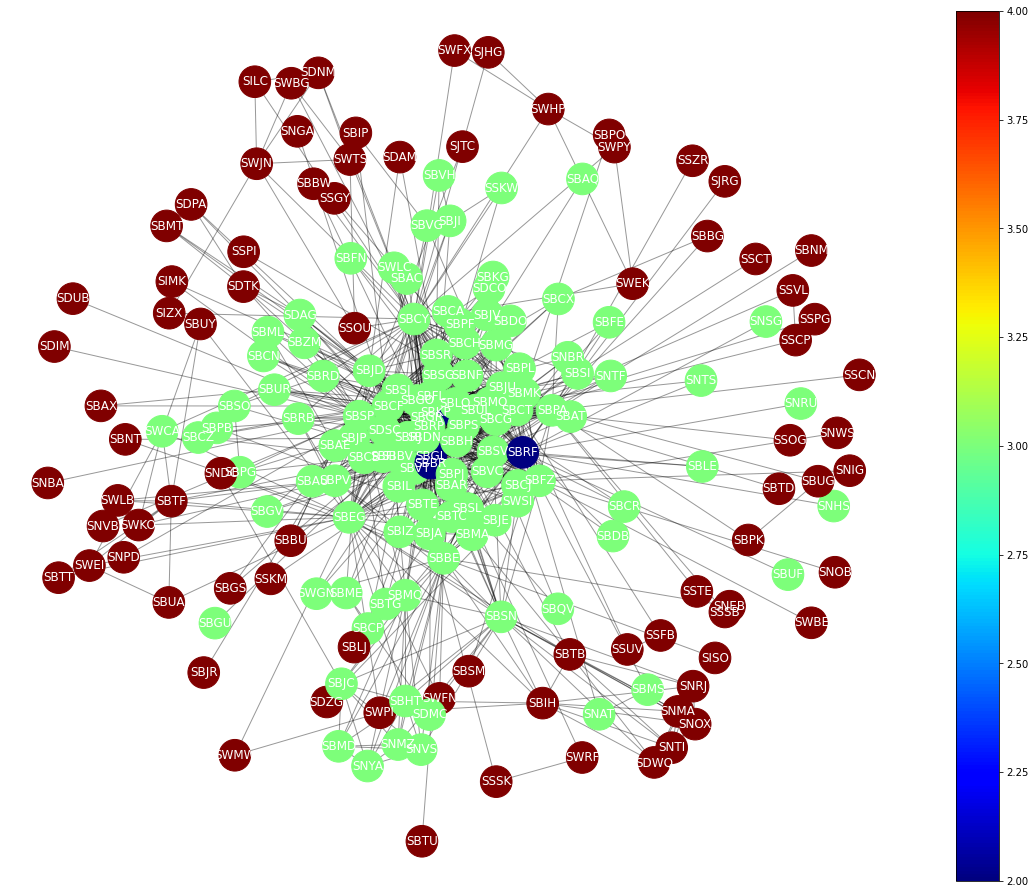

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G_2020,seed=123456789,k=0.3)
# color of nodes based on eccentricity
color = list(dict(nx.eccentricity(G_2020)).values())

# draw edges
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eccentricity.png', transparent=True,dpi=300)
plt.show()

In [ ]:
# the diameter of networks is the maximum eccentricy
print("Diameter of network (2020): {}".format(nx.diameter(G_2020)))

# whom are in the diamter
print([k for k,v in nx.eccentricity(G_2020).items() if v == nx.diameter(G_2020)])

Diameter of network (2020): 4
['SNGA', 'SIMK', 'SSKM', 'SBBG', 'SSCN', 'SBNM', 'SBTD', 'SBBU', 'SBTF', 'SWPI', 'SBAX', 'SJRG', 'SBBW', 'SBMT', 'SDZG', 'SDIM', 'SSFB', 'SNOB', 'SSZR', 'SNVB', 'SNPD', 'SBPO', 'SSOG', 'SBJR', 'SBPK', 'SBIH', 'SSTE', 'SBLJ', 'SWBG', 'SWKO', 'SSCP', 'SSSB', 'SSPI', 'SNWS', 'SNOX', 'SWTS', 'SSGY', 'SBIP', 'SDTK', 'SWEI', 'SWHP', 'SWMW', 'SIZX', 'SDNM', 'SBTU', 'SSUV', 'SBTT', 'SWBE', 'SNBA', 'SNEB', 'SBUA', 'SSPG', 'SWFX', 'SSCT', 'SBUG', 'SNIG', 'SWEK', 'SILC', 'SWJN', 'SBTB', 'SWPY', 'SWLB', 'SNDC', 'SWFN', 'SDUB', 'SNTI', 'SSVL', 'SBSM', 'SNMA', 'SBUY', 'SJHG', 'SSOU', 'SDWQ', 'SNRJ', 'SISO', 'SDPA', 'SWRF', 'SSSK', 'SDAM', 'SJTC', 'SBNT', 'SBGS']


## NX Periphery/Radius

In [ ]:
# the periphery of a network is a set of all nodes whose eccentriciy is equals the diameter
nx.periphery(G_2019)

['SBPC',
 'SSKM',
 'SNGX',
 'SNOS',
 'SSFB',
 'SBPO',
 'SSOG',
 'SNDT',
 'SSCP',
 'SNCT',
 'SSPI',
 'SSGY',
 'SNVS',
 'SNPJ',
 'SNTO',
 'SSUV',
 'SNUH',
 'SSPG',
 'SSCT',
 'SNVC',
 'SNYA',
 'SNMZ',
 'SNAR',
 'SBMD',
 'SNJM',
 'SNZA',
 'SNUI',
 'SSVL']

In [ ]:
# the radius of a network is the minimum eccentricity
print("Radius of network(2019): {}".format(nx.radius(G_2019)))
print([k for k,v in nx.eccentricity(G_2019).items() if v == nx.radius(G_2019)])

Radius of network(2019): 2
['SBGL', 'SBCF', 'SBPA', 'SBGR', 'SBKP', 'SBCY', 'SBEG', 'SBBR', 'SBRF', 'SBRP']


In [ ]:
# the center of a network is a set all nodes whose eccentricity equal the radius
nx.center(G_2019)

['SBGL',
 'SBCF',
 'SBPA',
 'SBGR',
 'SBKP',
 'SBCY',
 'SBEG',
 'SBBR',
 'SBRF',
 'SBRP']

In [ ]:
# the periphery of a network is a set of all nodes whose eccentriciy is equals the diameter
nx.periphery(G_2020)

['SNGA',
 'SIMK',
 'SSKM',
 'SBBG',
 'SSCN',
 'SBNM',
 'SBTD',
 'SBBU',
 'SBTF',
 'SWPI',
 'SBAX',
 'SJRG',
 'SBBW',
 'SBMT',
 'SDZG',
 'SDIM',
 'SSFB',
 'SNOB',
 'SSZR',
 'SNVB',
 'SNPD',
 'SBPO',
 'SSOG',
 'SBJR',
 'SBPK',
 'SBIH',
 'SSTE',
 'SBLJ',
 'SWBG',
 'SWKO',
 'SSCP',
 'SSSB',
 'SSPI',
 'SNWS',
 'SNOX',
 'SWTS',
 'SSGY',
 'SBIP',
 'SDTK',
 'SWEI',
 'SWHP',
 'SWMW',
 'SIZX',
 'SDNM',
 'SBTU',
 'SSUV',
 'SBTT',
 'SWBE',
 'SNBA',
 'SNEB',
 'SBUA',
 'SSPG',
 'SWFX',
 'SSCT',
 'SBUG',
 'SNIG',
 'SWEK',
 'SILC',
 'SWJN',
 'SBTB',
 'SWPY',
 'SWLB',
 'SNDC',
 'SWFN',
 'SDUB',
 'SNTI',
 'SSVL',
 'SBSM',
 'SNMA',
 'SBUY',
 'SJHG',
 'SSOU',
 'SDWQ',
 'SNRJ',
 'SISO',
 'SDPA',
 'SWRF',
 'SSSK',
 'SDAM',
 'SJTC',
 'SBNT',
 'SBGS']

In [ ]:
# the radius of a network is the minimum eccentricity
print("Radius of network(2020): {}".format(nx.radius(G_2020)))
print([k for k,v in nx.eccentricity(G_2020).items() if v == nx.radius(G_2020)])

Radius of network(2020): 2
['SBGL', 'SBKP', 'SBBR', 'SBRF']


In [ ]:
# the center of a network is a set all nodes whose eccentricity equal the radius
nx.center(G_2020)

['SBGL', 'SBKP', 'SBBR', 'SBRF']

## Degree Centrality

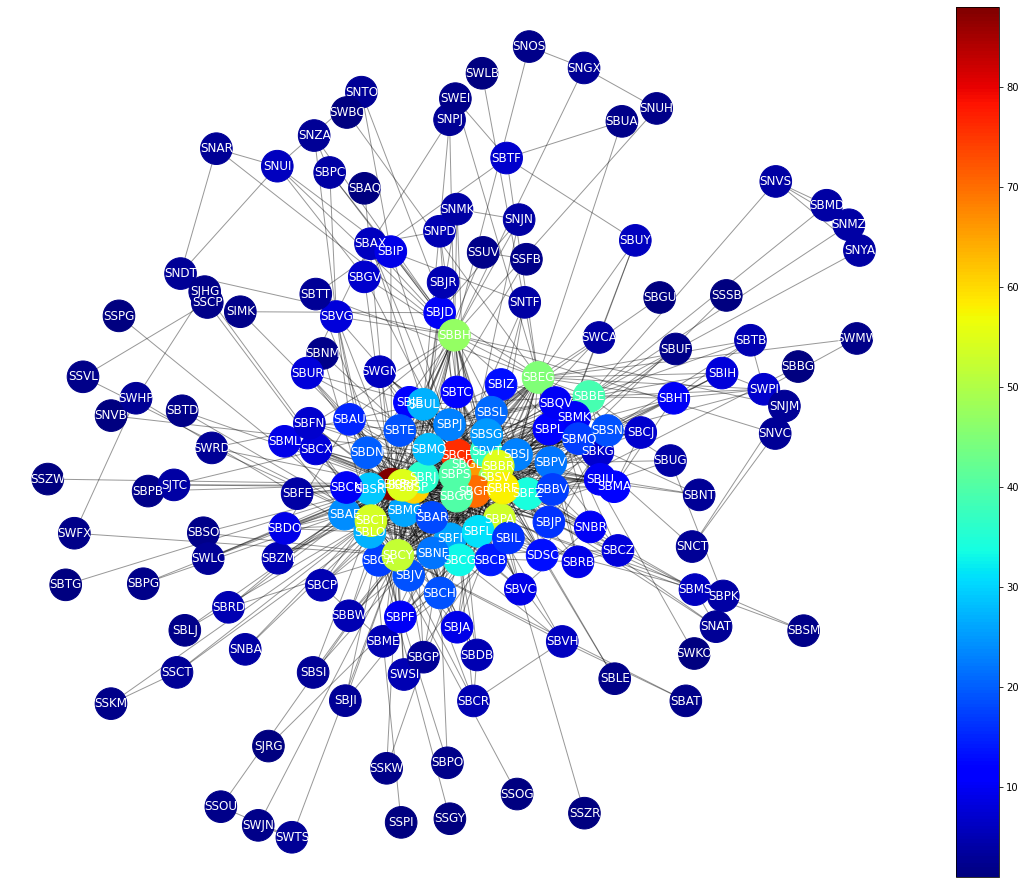

In [ ]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G_2019,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(G_2019)).values())

# draw edges
nx.draw_networkx_edges(G_2019,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2019,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2019, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

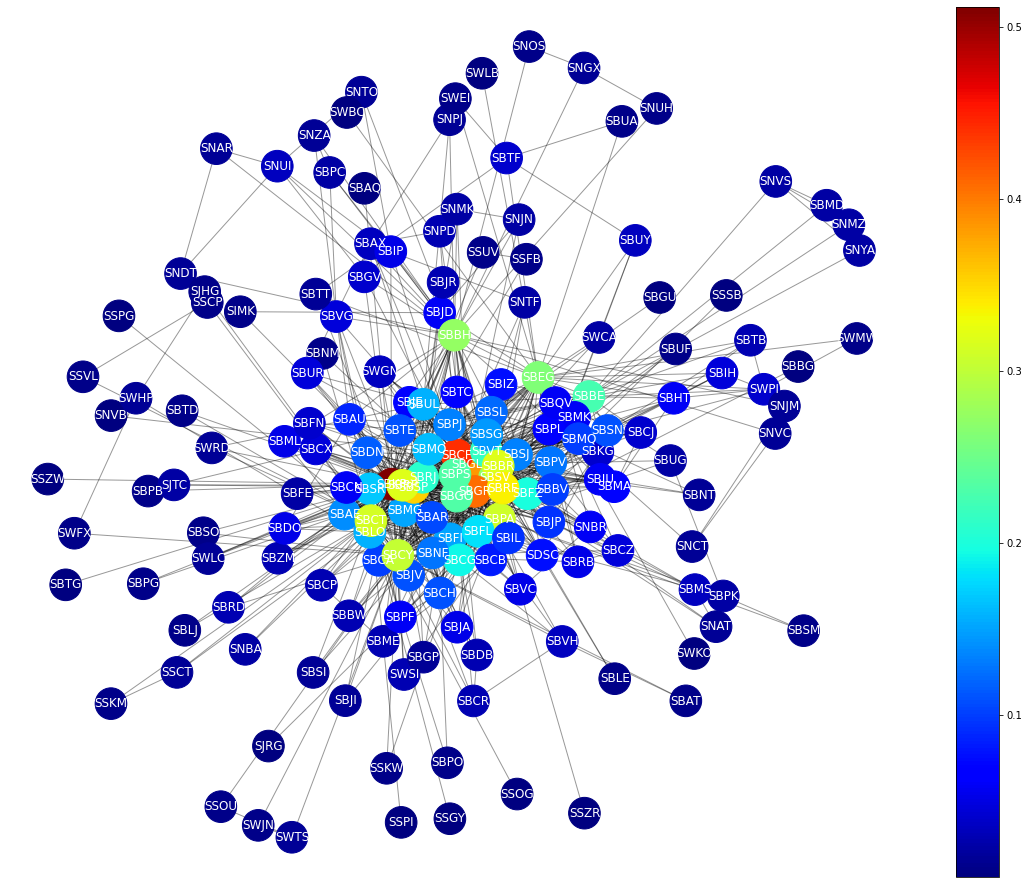

In [ ]:
# the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G_2019,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree_centrality(G_2019)).values())

# draw edges
nx.draw_networkx_edges(G_2019,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2019,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(G_2019, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

In [ ]:
nx.degree_centrality(G_2019)

{'SBAE': 0.13953488372093023,
 'SBAQ': 0.005813953488372093,
 'SBAR': 0.10465116279069767,
 'SBAT': 0.011627906976744186,
 'SBAU': 0.0872093023255814,
 'SBAX': 0.03488372093023256,
 'SBBE': 0.22674418604651161,
 'SBBG': 0.005813953488372093,
 'SBBH': 0.27325581395348836,
 'SBBR': 0.31976744186046513,
 'SBBV': 0.09883720930232558,
 'SBBW': 0.029069767441860465,
 'SBCA': 0.09883720930232558,
 'SBCB': 0.08139534883720931,
 'SBCF': 0.4418604651162791,
 'SBCG': 0.19186046511627908,
 'SBCH': 0.11046511627906977,
 'SBCJ': 0.040697674418604654,
 'SBCN': 0.05813953488372093,
 'SBCP': 0.029069767441860465,
 'SBCR': 0.029069767441860465,
 'SBCT': 0.313953488372093,
 'SBCX': 0.046511627906976744,
 'SBCY': 0.3023255813953488,
 'SBCZ': 0.046511627906976744,
 'SBDB': 0.029069767441860465,
 'SBDN': 0.11627906976744186,
 'SBDO': 0.05232558139534883,
 'SBEG': 0.2616279069767442,
 'SBFE': 0.023255813953488372,
 'SBFI': 0.1511627906976744,
 'SBFL': 0.18023255813953487,
 'SBFN': 0.040697674418604654,
 'SBF

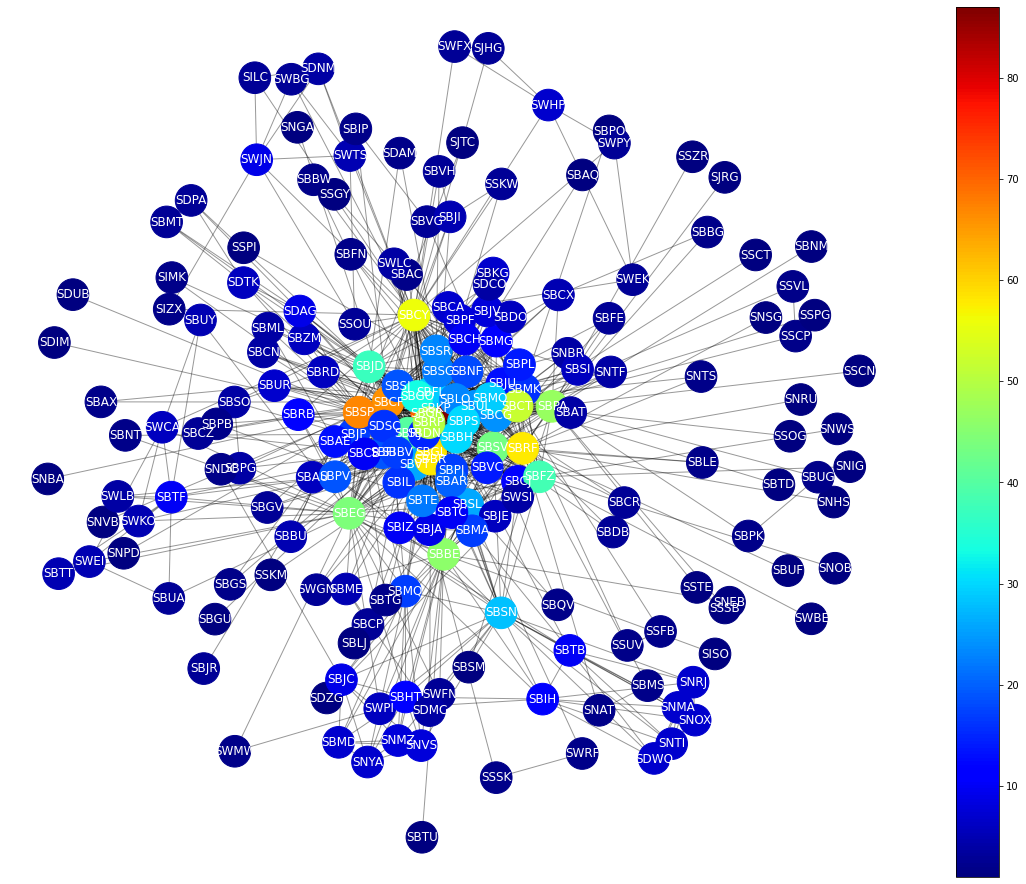

In [ ]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G_2020,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(G_2020)).values())

# draw edges
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

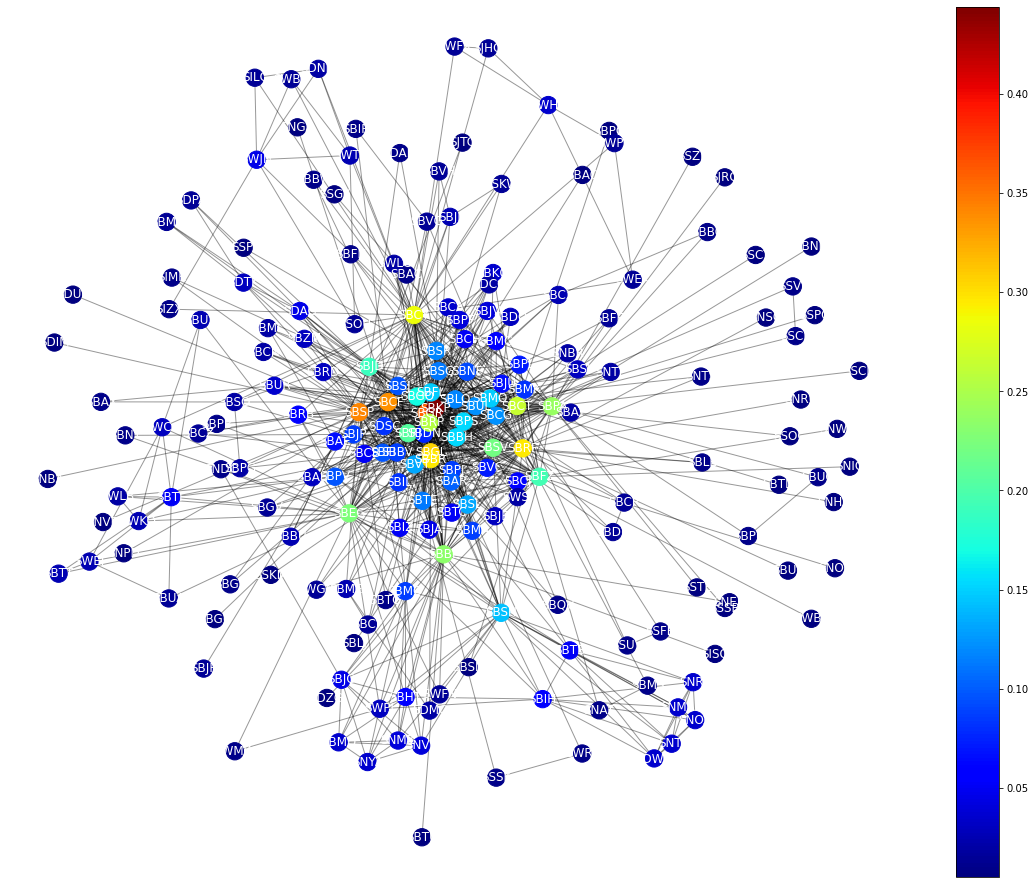

In [ ]:
# the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G_2020,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree_centrality(G_2020)).values())

# draw edges
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

In [ ]:
nx.degree_centrality(G_2020)

{'SBAC': 0.01020408163265306,
 'SBAE': 0.06632653061224489,
 'SBAQ': 0.00510204081632653,
 'SBAR': 0.1020408163265306,
 'SBAT': 0.02040816326530612,
 'SBAU': 0.030612244897959183,
 'SBAX': 0.01020408163265306,
 'SBBE': 0.2346938775510204,
 'SBBG': 0.01020408163265306,
 'SBBH': 0.1530612244897959,
 'SBBR': 0.29591836734693877,
 'SBBU': 0.02551020408163265,
 'SBBV': 0.08673469387755102,
 'SBBW': 0.01020408163265306,
 'SBCA': 0.03571428571428571,
 'SBCB': 0.0510204081632653,
 'SBCF': 0.336734693877551,
 'SBCG': 0.12244897959183673,
 'SBCH': 0.0510204081632653,
 'SBCJ': 0.061224489795918366,
 'SBCN': 0.02040816326530612,
 'SBCP': 0.015306122448979591,
 'SBCR': 0.015306122448979591,
 'SBCT': 0.26530612244897955,
 'SBCX': 0.02551020408163265,
 'SBCY': 0.2857142857142857,
 'SBCZ': 0.015306122448979591,
 'SBDB': 0.015306122448979591,
 'SBDN': 0.07653061224489795,
 'SBDO': 0.030612244897959183,
 'SBEG': 0.22448979591836732,
 'SBFE': 0.015306122448979591,
 'SBFI': 0.09693877551020408,
 'SBFL': 0

## Betweenness Centrality

In [ ]:
nx.betweenness_centrality(G_2019)

{'SBAE': 0.002742517905164037,
 'SBAQ': 0.0,
 'SBAR': 0.0004910502914647051,
 'SBAT': 0.0,
 'SBAU': 0.0007997562794212688,
 'SBAX': 0.0007481236531504126,
 'SBBE': 0.05941014457095068,
 'SBBG': 0.0,
 'SBBH': 0.1577766784313359,
 'SBBR': 0.02455102916586188,
 'SBBV': 0.000514788194060444,
 'SBBW': 0.0,
 'SBCA': 0.00022033498139478755,
 'SBCB': 0.0009880918417763279,
 'SBCF': 0.09341666358662422,
 'SBCG': 0.012642525790199614,
 'SBCH': 0.003611754590795197,
 'SBCJ': 1.4681700728212358e-05,
 'SBCN': 8.31104462275413e-06,
 'SBCP': 0.00026419316806354867,
 'SBCR': 0.0003072257188324259,
 'SBCT': 0.13918409287718853,
 'SBCX': 0.0,
 'SBCY': 0.11888643497831043,
 'SBCZ': 0.0,
 'SBDB': 0.00010648896847254629,
 'SBDN': 0.0015431497756530968,
 'SBDO': 6.378546387434554e-05,
 'SBEG': 0.11530165684572774,
 'SBFE': 0.0,
 'SBFI': 0.0005331340956128928,
 'SBFL': 0.006720636763522451,
 'SBFN': 4.857104000310854e-06,
 'SBFZ': 0.012388722139170387,
 'SBGL': 0.06520458207204229,
 'SBGO': 0.009445734645657

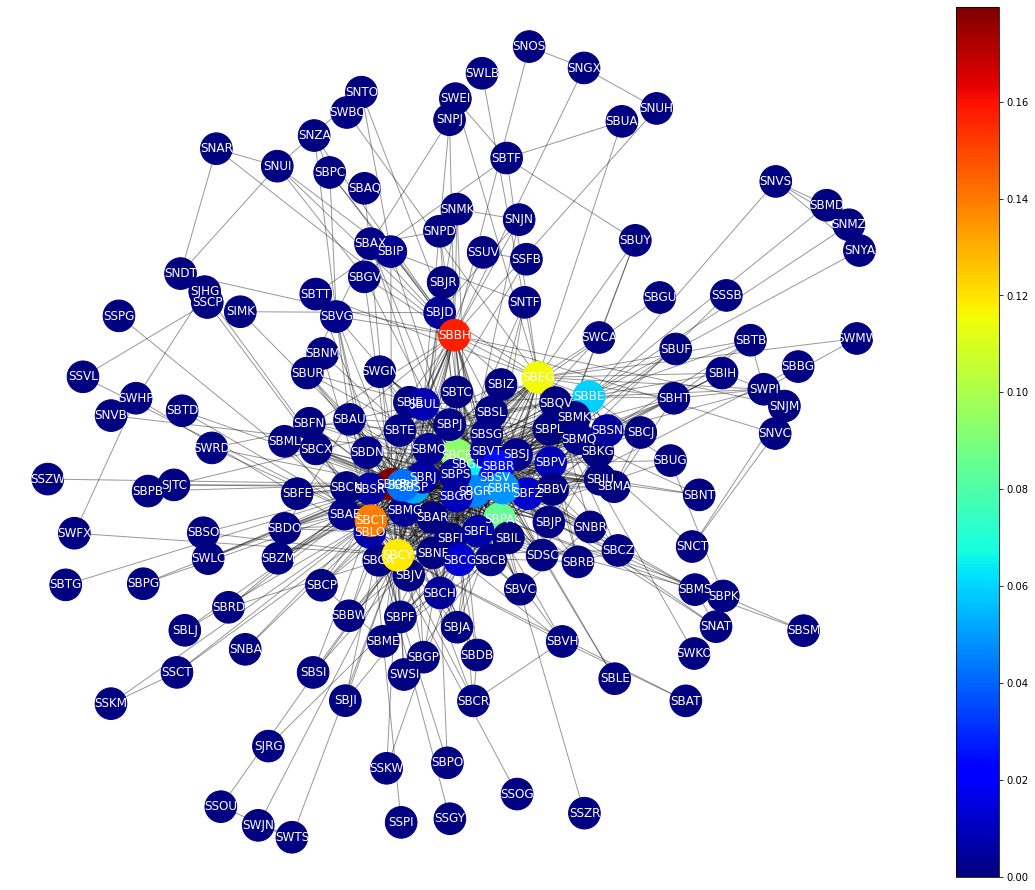

In [ ]:
# the betwenness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G_2019,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(G_2019)).values())

# draw edges
nx.draw_networkx_edges(G_2019,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2019,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(G_2019, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

In [ ]:
nx.betweenness_centrality(G_2020)

{'SBAC': 0.0,
 'SBAE': 0.0016872629385150035,
 'SBAQ': 0.0,
 'SBAR': 0.0006309580006597277,
 'SBAT': 3.8783291941064034e-05,
 'SBAU': 0.0,
 'SBAX': 0.0,
 'SBBE': 0.09531318585210478,
 'SBBG': 0.0,
 'SBBH': 0.01382371273774289,
 'SBBR': 0.04351290457555117,
 'SBBU': 6.541077969649398e-06,
 'SBBV': 0.0033841261778189418,
 'SBBW': 0.0,
 'SBCA': 4.1530653775551725e-05,
 'SBCB': 0.00014378970468104078,
 'SBCF': 0.09365989314433537,
 'SBCG': 0.004149658472213189,
 'SBCH': 7.860837923632271e-05,
 'SBCJ': 8.955467833025192e-05,
 'SBCN': 0.0,
 'SBCP': 0.0,
 'SBCR': 2.6164311878597592e-05,
 'SBCT': 0.135965364087805,
 'SBCX': 0.0010561621311690578,
 'SBCY': 0.1494710855577649,
 'SBCZ': 0.0,
 'SBDB': 2.6164311878597592e-05,
 'SBDN': 0.0022240929141998382,
 'SBDO': 0.0,
 'SBEG': 0.10114717648815803,
 'SBFE': 0.0,
 'SBFI': 0.003847193143361693,
 'SBFL': 0.004060893625846645,
 'SBFN': 0.0,
 'SBFZ': 0.05951996910268145,
 'SBGL': 0.04719406151692171,
 'SBGO': 0.009503438039849883,
 'SBGR': 0.043595150

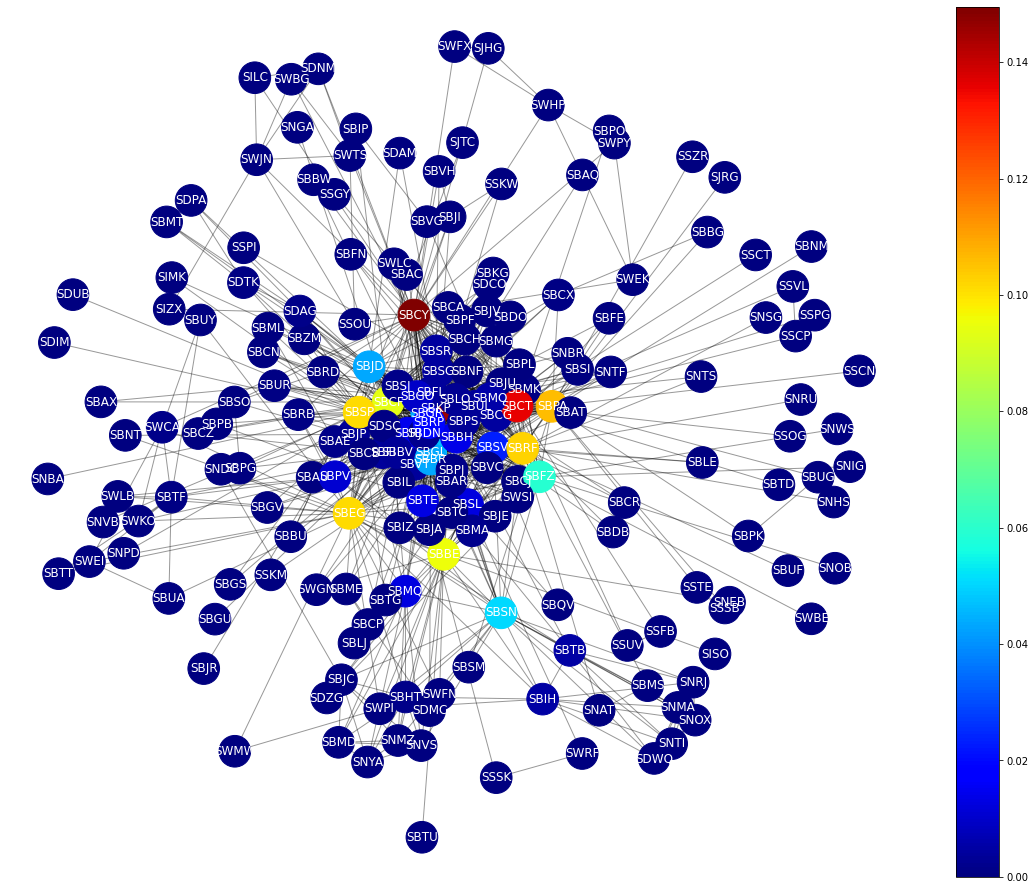

In [ ]:
# the betwenness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G_2020,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(G_2020)).values())

# draw edges
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

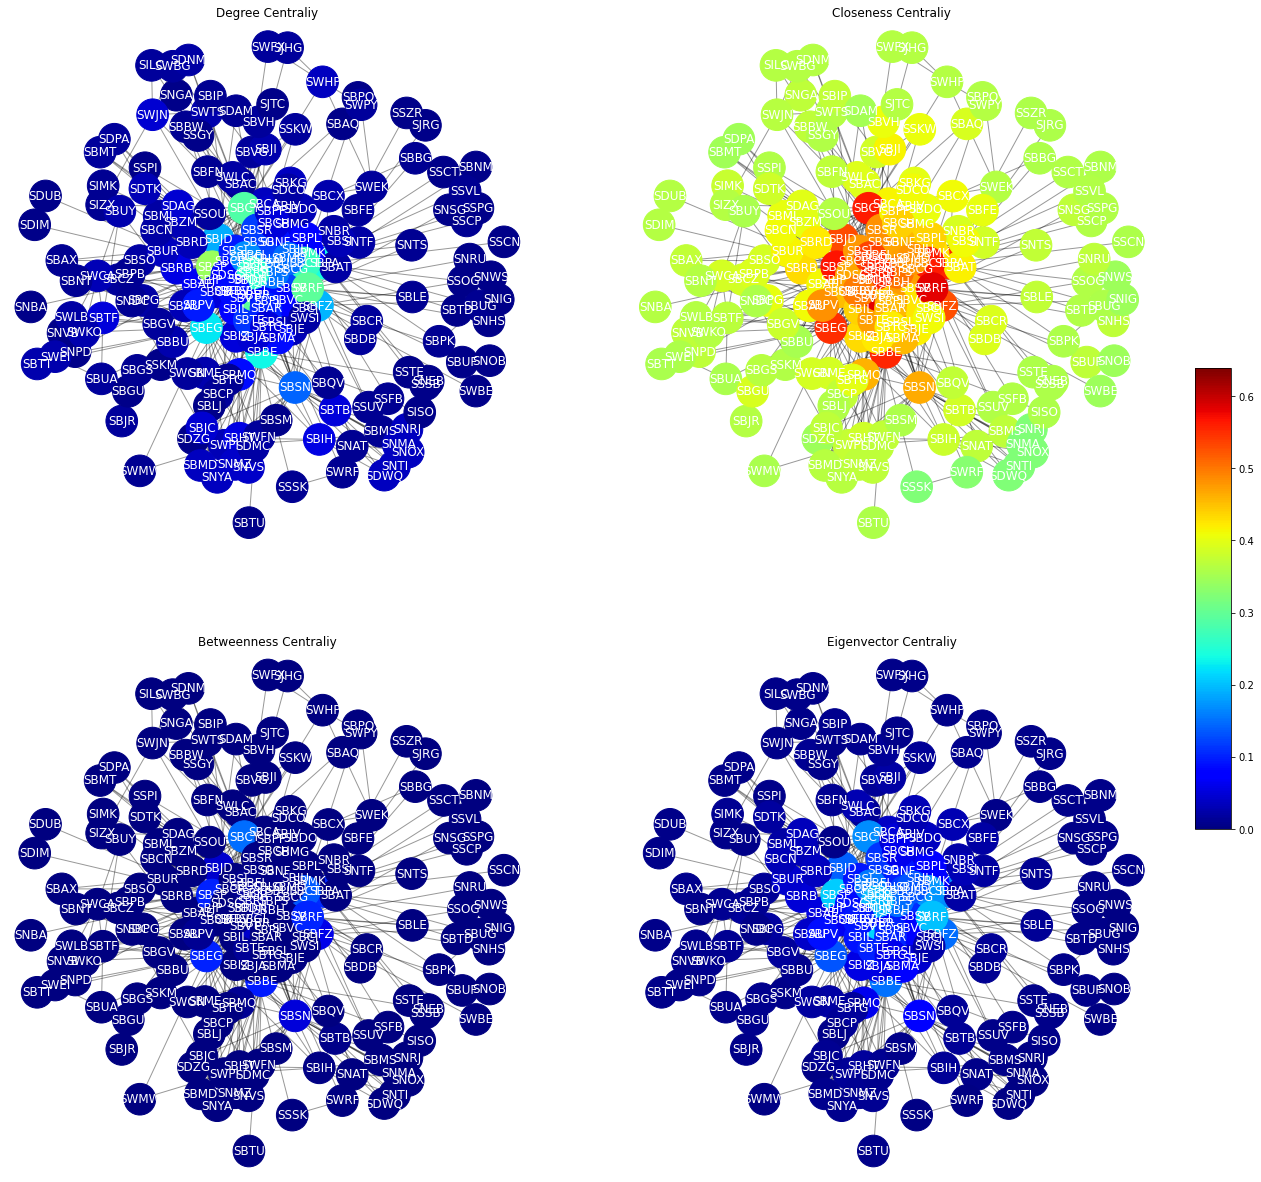

In [ ]:
# the eigenvector centrality of network(g)
fiG_2020, ax = plt.subplots(2,2,figsize=(20,16))

# max value of metrics 
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(G_2020).items()]),
                      max([v for k, v in nx.degree_centrality(G_2020).items()]),
                      max([v for k, v in nx.closeness_centrality(G_2020).items()]),
                      max([v for k, v in nx.betweenness_centrality(G_2020).items()])])

# layout position
pos = nx.spring_layout(G_2020,seed=123456789,k=0.3)

# color of nodes
color_degree = list(dict(nx.degree_centrality(G_2020)).values())
color_closeness = list(dict(nx.closeness_centrality(G_2020)).values())
color_betweenness = list(dict(nx.betweenness_centrality(G_2020)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(G_2020)).values())

# 
# draw edges
#
# degree centrality
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax[1,1])

# draw nodes
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_size=1000,
                 node_color=color_degree,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_size=1000,
                 node_color=color_closeness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_size=1000,
                 node_color=color_betweenness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_size=1000,
                 node_color=color_eigenvector,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

# 
# draw labels
#
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax[0,0])
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax[0,1])
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax[1,0])
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax[1,1])

# eliminate axis
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Degree Centraliy")
ax[0,1].set_title("Closeness Centraliy")
ax[1,0].set_title("Betweenness Centraliy")
ax[1,1].set_title("Eigenvector Centraliy")


# Create an unique colorbar
# reference: https://stackoverflow.com/questions/60848582/unique-colorbar-at-the-right-of-multiple-subplots
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('alltogether.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

In [ ]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

## Bivariate Analysis


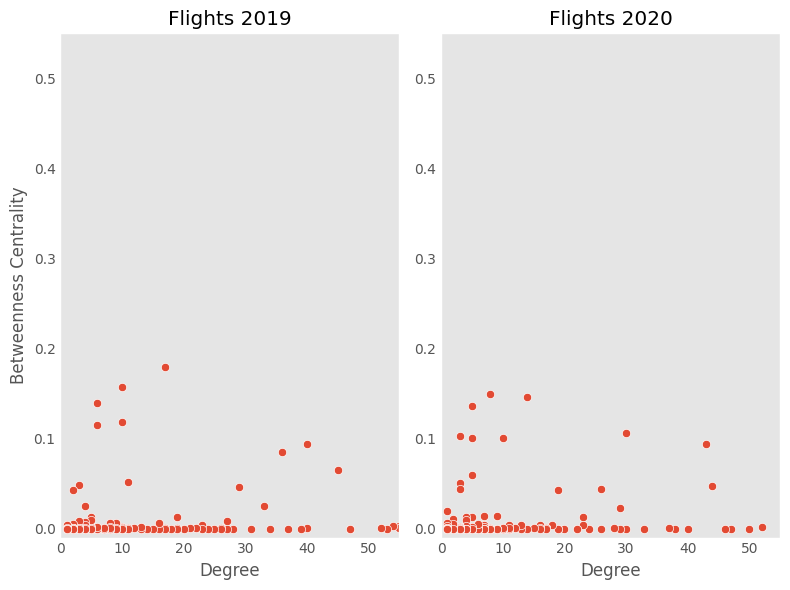

In [ ]:
plt.style.use("ggplot")
#plt.style.use("default")

fig, ax = plt.subplots(1,2,figsize=(8,6))

# degree sequence
degree_sequence = sorted([d for n, d in G_2019.degree()], reverse=True) 
degree_sequence2 = sorted([d for n, d in G_2020.degree()], reverse=True)  

sns.scatterplot(x=degree_sequence,y=[v for k,v in nx.betweenness_centrality(G_2019).items()],ax=ax[0])
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("Betweenness Centrality")
ax[0].set_title("Flights 2019")
ax[0].set_xlim(0,55)
ax[0].set_ylim(-0.01,0.55)
ax[0].grid(False)

sns.scatterplot(x=degree_sequence2,y=[v for k,v in nx.betweenness_centrality(G_2020).items()],ax=ax[1])
ax[1].set_xlabel("Degree")
ax[1].set_title("Flights 2020")
ax[1].set_xlim(0,55)
ax[1].set_ylim(-0.01,0.55)
ax[1].grid(False)

plt.tight_layout()
plt.savefig('degree_vs_betweenness.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

In [ ]:
bc_2019 = pd.Series(nx.betweenness_centrality(G_2019))
dc_2019 = pd.Series(nx.degree_centrality(G_2019))

df_2019 = pd.DataFrame.from_dict({"Betweenness": bc_2019,
                            "Degree": dc_2019                
                           })
df_2019.reset_index(inplace=True,drop=True)
df_2019.head()

Betweenness    Degree
0     0.000064  0.052326
1     0.000021  0.075581
2     0.000166  0.023256
3     0.059410  0.226744
4     0.001354  0.093023

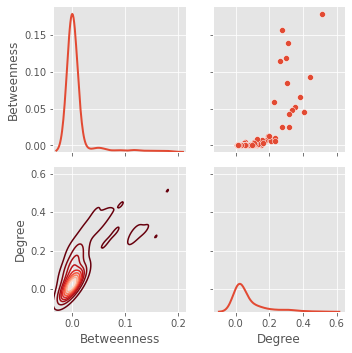

In [ ]:
fig = sns.PairGrid(df_2019)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

In [ ]:
bc_2020 = pd.Series(nx.betweenness_centrality(G_2020))
dc_2020 = pd.Series(nx.degree_centrality(G_2020))

df_2020 = pd.DataFrame.from_dict({"Betweenness": bc_2020,
                            "Degree": dc_2020                 
                           })
df_2020.reset_index(inplace=True,drop=True)
df_2020.head()

Betweenness    Degree
0     0.000822  0.056122
1     0.000000  0.005102
2     0.000026  0.051020
3     0.095313  0.234694
4     0.003036  0.086735

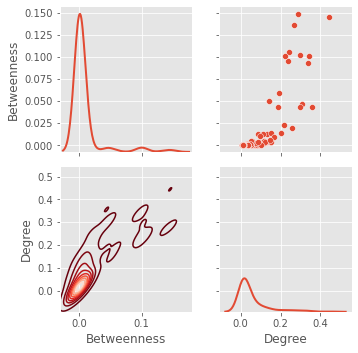

In [ ]:
fig = sns.PairGrid(df_2020)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

## PDF

### 2019

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in G_2019.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data_2019 = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

In [ ]:
# calc the width of each bin using numpy
# diff calc the difference between two positions in the array
bin_width_2019 = np.diff(all_data_2019[1])
bin_width_2019

array([12.42857143, 12.42857143, 12.42857143, 12.42857143, 12.42857143,
       12.42857143, 12.42857143])

In [ ]:
# total number of elements in array
all_data_2019[0].sum()

173.0

In [ ]:
# probability density function for each bin
# please check the right figure above and compare the results
all_data_2019[0]/(all_data_2019[0].sum() * bin_width_2019)

array([0.05813567, 0.00930171, 0.00511594, 0.00279051, 0.0032556 ,
       0.00093017, 0.00093017])

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

### 2020

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence2 = sorted([d for n, d in G_2020.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data_2020 = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

In [ ]:
# calc the width of each bin using numpy
# diff calc the difference between two positions in the array
bin_width_2020 = np.diff(all_data_2020[1])
bin_width_2020

array([12.42857143, 12.42857143, 12.42857143, 12.42857143, 12.42857143,
       12.42857143, 12.42857143])

In [ ]:
# total number of elements in array
all_data_2020[0].sum()

173.0

In [ ]:
# probability density function for each bin
# please check the right figure above and compare the results
all_data_2020[0]/(all_data_2020[0].sum() * bin_width_2020)

array([0.05813567, 0.00930171, 0.00511594, 0.00279051, 0.0032556 ,
       0.00093017, 0.00093017])

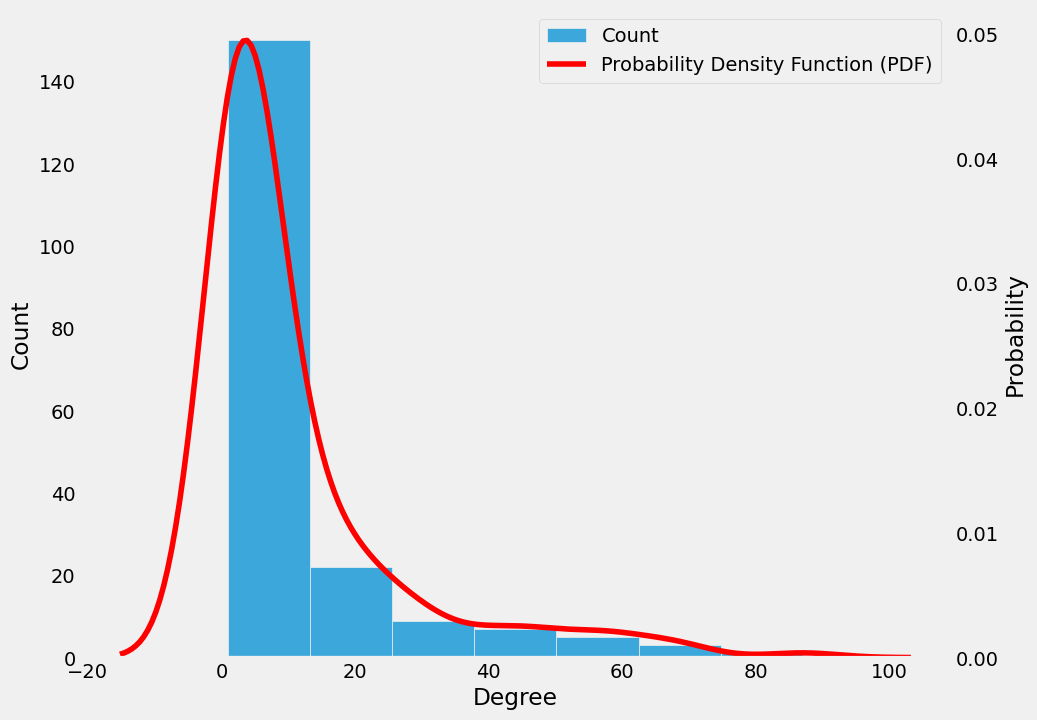

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence2,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence2,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

## Core Decomposition

### 2019

In [ ]:
#Removing self loops
G_2019.remove_edges_from(nx.selfloop_edges(G_2019))

In [ ]:
# k-core of the network
set([v for k,v in nx.core_number(G_2019).items()])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [ ]:
# 
# Change the variable core to visualize the nodes in k-core
# Note that 0-core is the all network
core_2019 = 3
for i in nx.k_core(G_2019,core_2019):
  print(i)

SBRB
SBIZ
SBPC
SBBE
SBJP
SBKG
SBMG
SBCA
SBAE
SBML
SBGL
SBCF
SBDB
SBCX
SBPA
SBSV
SBGR
SNBR
SNTF
SBVT
SBSL
SBZM
SBJD
SBCZ
SBFI
SBTF
SWPI
SBJU
SBMK
SBAX
SBCG
SBRD
SBME
SWLC
SBKP
SBFL
SBBW
SBSG
SBNF
SBJV
SBSP
SWGN
SBPL
SBJE
SBBH
SBVG
SBGV
SBCY
SBSI
SBMA
SBLO
SBRJ
SBCB
SBJA
SBSR
SBSJ
SNPD
SBDO
SBCJ
SBJR
SBCP
SBPK
SBIH
SBEG
SBCT
SBIL
SBMQ
SBVC
SBFZ
SNDT
SBHT
SBFN
SBTE
SDSC
SBGO
SBUL
SNCT
SBPF
SBCR
SBSN
SNMK
SWCA
SBBR
SBPJ
SNVS
SBDN
SBAU
SNPJ
SBIP
SBRF
SNTO
SNJN
SBPV
SBUR
SBCN
SBTT
SBPS
SBUG
SBJI
SNVC
SBVH
SNYA
SBTB
SBAR
SNMZ
SNAR
SBMD
SNJM
SNZA
SBMS
SBRP
SNUI
SBTC
SBCH
SBMO
SBBV
SBFE
SBQV
SWSI
SBGP
SNAT
SBNT
SBUY
SWRD


In [ ]:
# 
# Change the variable shell to visualize the nodes in k-shell
# Note that vertices in k-shell are member of k-core, however they are not member of (k+1)-core
shell_2019 = 3
for i in nx.k_shell(G_2019,shell_2019):
  print(i)

SNPJ
SBJR
SWSI
SNTO
SBMS
SBUG
SNAR
SNAT
SBNT
SBUY
SBJI
SNJM
SWRD
SWLC
SBPK
SNCT
SNUI
SBSI
SNVC
SBGP
SBPC
SBTF
SNDT
SBRD
SNZA
SBTT
SWCA


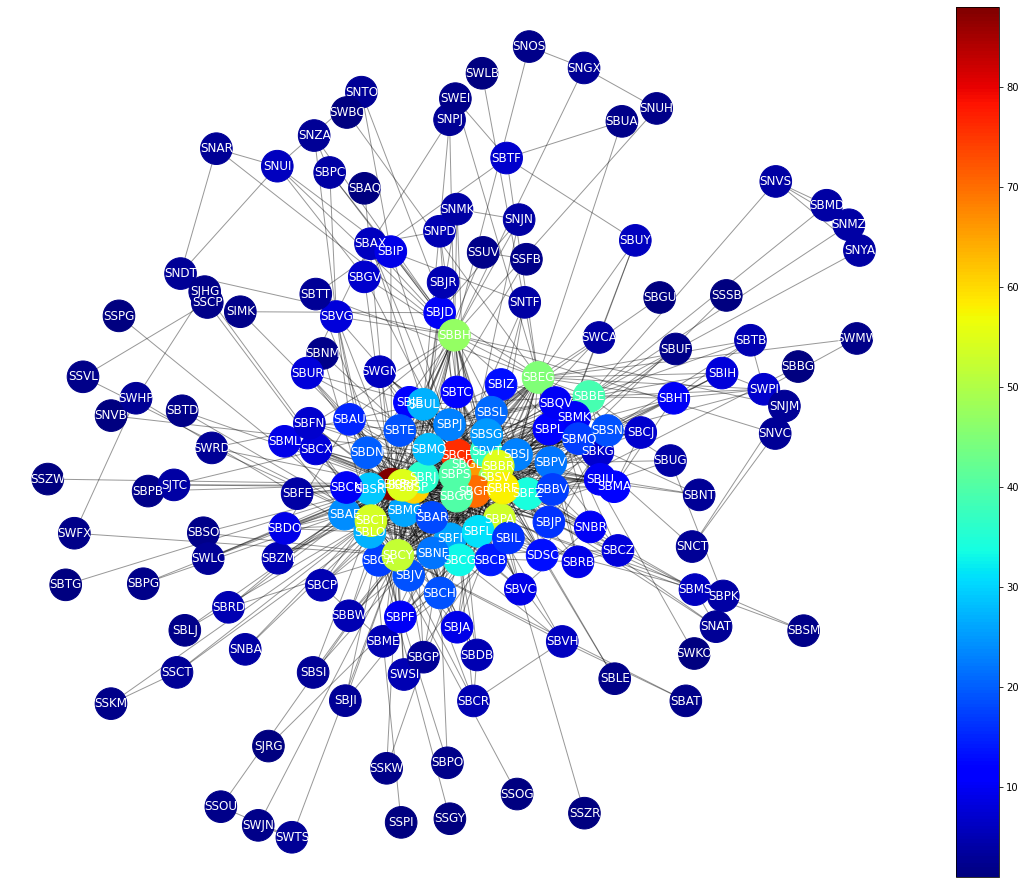

In [ ]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos_2019 = nx.spring_layout(G_2019,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(G_2019)).values())

# draw edges
nx.draw_networkx_edges(G_2019,
                       pos=pos_2019,
                       alpha=0.4, ax=ax)

# draw nodes
nodes_2019 = nx.draw_networkx_nodes(G_2019,
                 pos=pos_2019,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2019, pos=pos_2019,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes_2019)
plt.savefig('flights_2019.png', transparent=True,dpi=600)
plt.show()

In [ ]:
# 1-core is composed for all vertices in the network because this network is connected
len([G_2019.degree(node) for node in list(nx.k_core(G_2019,1))])

173

In [ ]:
# who are in the innermost core
print(list(nx.k_shell(G_2019,17)))

['SBFL', 'SBKP', 'SBGO', 'SBUL', 'SBBH', 'SBSG', 'SBBR', 'SBCF', 'SBRP', 'SBEG', 'SBPA', 'SBBE', 'SBPJ', 'SBCY', 'SBVT', 'SBSR', 'SBLO', 'SBSJ', 'SBSV', 'SBMG', 'SBFZ', 'SBCG', 'SBCT', 'SBSP', 'SBRF', 'SBMO', 'SBGR', 'SBGL', 'SBFI', 'SBRJ', 'SBPS']


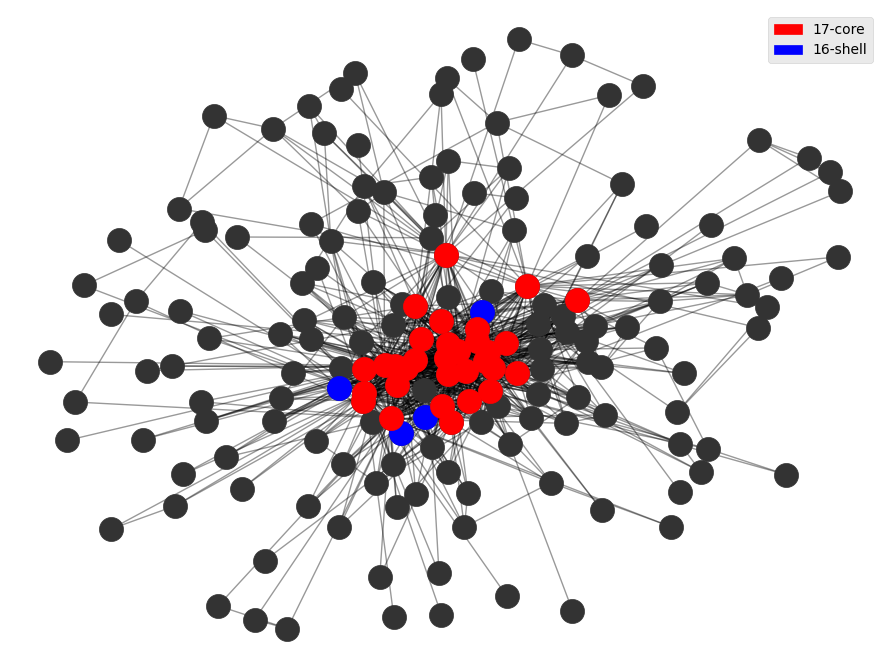

In [ ]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
G_2019_core_16 = nx.k_shell(G_2019, 16)
G_2019_core_17 = nx.k_core(G_2019, 17)

# layout position
pos = nx.spring_layout(G_2019,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(G_2019,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2019,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(G_2019_core_16,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(G_2019_core_17,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='17-core')
blue_patch = mpatches.Patch(color='blue', label='16-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_flights_2019.png', transparent=True,dpi=600)
plt.show()

### 2020

In [ ]:
#Removing self loops
G_2020.remove_edges_from(nx.selfloop_edges(G_2020))

In [ ]:
# k-core of the network
set([v for k,v in nx.core_number(G_2020).items()])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

In [ ]:
# 
# Change the variable core to visualize the nodes in k-core
# Note that 0-core is the all network
core_2020 = 3
for i in nx.k_core(G_2020,core_2020):
  print(i)

SBRB
SBIZ
SBBE
SBJP
SBKG
SBMG
SBCA
SBAE
SBML
SBGL
SBCF
SBDB
SBCX
SBPA
SBSV
SBSO
SBGR
SNBR
SNTF
SBVT
SBSL
SBZM
SBAT
SBBU
SBJD
SBCZ
SBFI
SBTF
SWPI
SBJU
SBMK
SBCG
SBRD
SBME
SWLC
SBKP
SBFL
SBPG
SBSG
SBNF
SBJV
SBSP
SBMT
SWGN
SBPL
SBJE
SBBH
SBGV
SBCY
SBSI
SBMA
SBLO
SBRJ
SBCB
SBJA
SBSR
SBSJ
SBDO
SBCJ
SBCP
SBIH
SBEG
SBCT
SBIL
SBMQ
SBVC
SBFZ
SBHT
SBTE
SDSC
SBGO
SSKW
SBUL
SWBG
SWKO
SBPF
SBCR
SBSN
SWCA
SNOX
SBBR
SWTS
SBPJ
SNVS
SBDN
SBAU
SDTK
SBRF
SWEI
SWHP
SBPV
SDNM
SBUR
SBCN
SBTT
SBJC
SBPS
SBUA
SWFX
SBJI
SDCO
SBVH
SWEK
SILC
SWJN
SNYA
SBTB
SWPY
SWLB
SBAR
SWFN
SNMZ
SBMD
SNTI
SBRP
SBTC
SBCH
SDAG
SBMO
SNMA
SBBV
SWSI
SBFE
SBUY
SJHG
SSOU
SDWQ
SNRJ
SDPA


In [ ]:
# 
# Change the variable shell to visualize the nodes in k-shell
# Note that vertices in k-shell are member of k-core, however they are not member of (k+1)-core
shell_2020 = 3
for i in nx.k_shell(G_2020,shell_2020):
  print(i)

SSKW
SWFX
SBVH
SWHP
SILC
SSOU
SBUA
SWEI
SWPY
SWTS
SBUY
SBJI
SWEK
SDPA
SBCZ
SBCR
SBCP
SJHG
SBDB
SBMT
SWJN
SWFN
SBBU
SBME
SBGV
SWGN
SDNM
SBTT
SBFE
SWBG


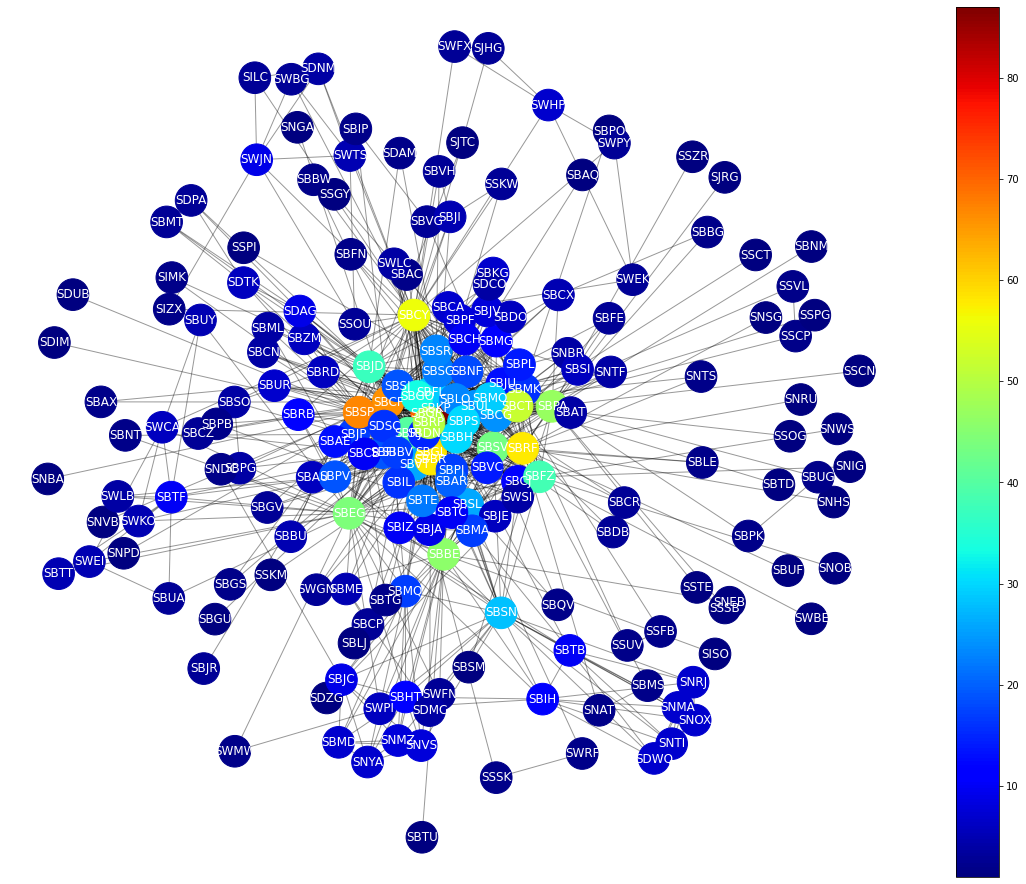

In [ ]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos_2020 = nx.spring_layout(G_2020,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(G_2020)).values())

# draw edges
nx.draw_networkx_edges(G_2020,
                       pos=pos_2020,
                       alpha=0.4, ax=ax)

# draw nodes
nodes_2020 = nx.draw_networkx_nodes(G_2020,
                 pos=pos_2020,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2020, pos=pos_2020,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes_2020)
plt.savefig('flights_2020.png', transparent=True,dpi=600)
plt.show()

In [ ]:
# 1-core is composed for all vertices in the network because this network is connected
len([G_2020.degree(node) for node in list(nx.k_core(G_2020,1))])

197

In [ ]:
# who are in the innermost core
print(list(nx.k_shell(G_2020,17)))

['SBFL', 'SBKP', 'SBGO', 'SBUL', 'SBJD', 'SBBH', 'SBBR', 'SBCF', 'SBRP', 'SBPA', 'SBBE', 'SBCY', 'SBVT', 'SBSR', 'SBSV', 'SBFZ', 'SBCT', 'SBSP', 'SBRF', 'SBMO', 'SBGR', 'SBGL', 'SBRJ', 'SBPS']


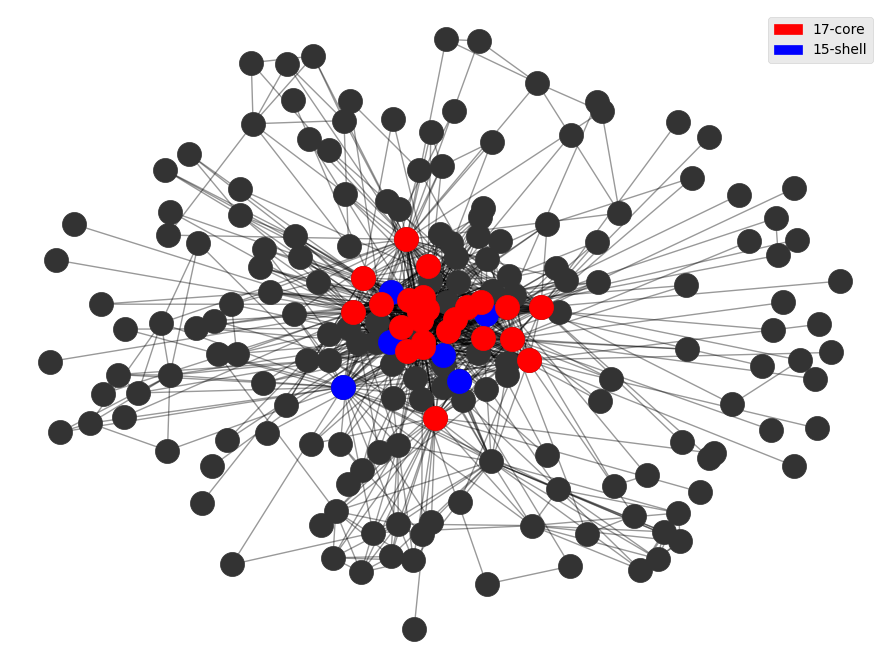

In [ ]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
G_2020_core_15 = nx.k_shell(G_2020, 15)
G_2020_core_17 = nx.k_core(G_2020, 17)

# layout position
pos = nx.spring_layout(G_2020,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(G_2020_core_15,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(G_2020_core_17,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='17-core')
blue_patch = mpatches.Patch(color='blue', label='15-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_flights_2020.png', transparent=True,dpi=600)
plt.show()